## Ejemplo 1

### Librerias

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
import glob ### Por si queremos hacer un list file
print(glob.glob("F:/Neoland/Data/Anova/*.csv"))


['F:/Neoland/Data/Anova\\Objeto.csv', 'F:/Neoland/Data/Anova\\Precio.csv', 'F:/Neoland/Data/Anova\\Tienda.csv']


Lectura de ficheros

In [2]:
Nombre = pd.read_csv("F:/Neoland/Data/Anova/Objeto.csv",delimiter=";")
Oficina = pd.read_csv("F:/Neoland/Data/Anova/Tienda.csv",delimiter=";")
Precio = pd.read_csv("F:/Neoland/Data/Anova/Precio.csv",delimiter=";",decimal=",")
df=Precio.merge(Oficina,  how='inner', left_on='Key_Tienda', right_on='Key_Tienda')
df=df.merge(Nombre,  how='inner', left_on='Key_Objeto', right_on='Key_Objeto')

In [3]:
df.shape

(151688, 6)

Eliminamos las llaves 

In [4]:
df=df.drop(['Key_Objeto','Key_Tienda'],axis=1)

In [5]:
df['Precio']=df['Precio']

In [6]:
df.groupby('Tienda')['Precio'].mean()

Tienda
Tienda_112     998.398239
Tienda_302    1001.206188
Tienda_652     983.443472
Tienda_732     998.632319
Name: Precio, dtype: float64

### Histograma

In [7]:
Tienda1=df[df.Tienda=='Tienda_652']
Tienda2=df[df.Tienda=='Tienda_732']
Tienda3=df[df.Tienda=='Tienda_302']
Tienda4=df[df.Tienda=='Tienda_112']

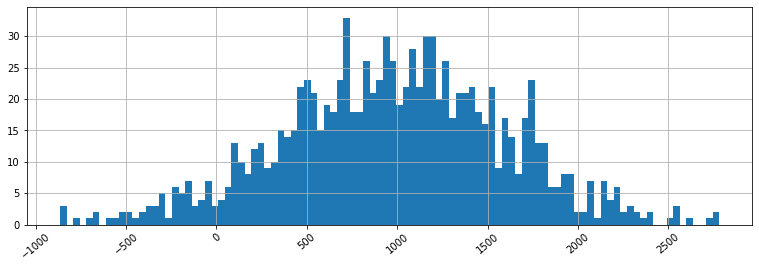

In [8]:
Tienda1['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=40)

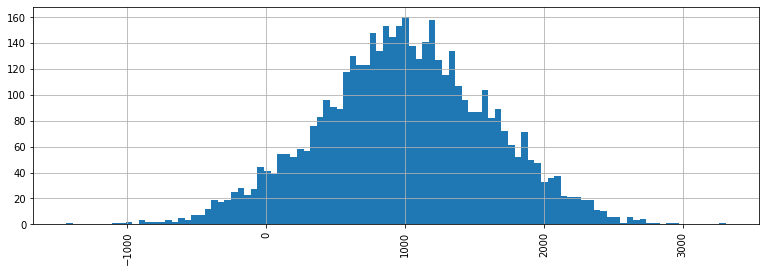

In [9]:
Tienda2['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=90)

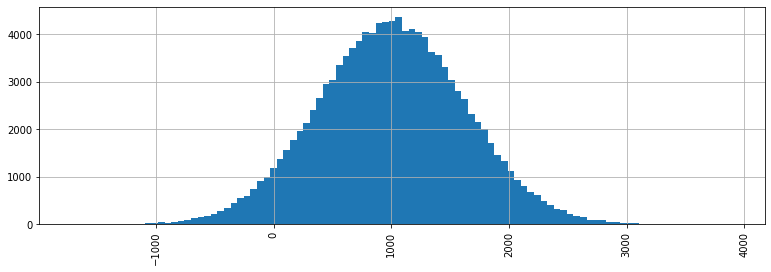

In [40]:
Tienda3['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=90)

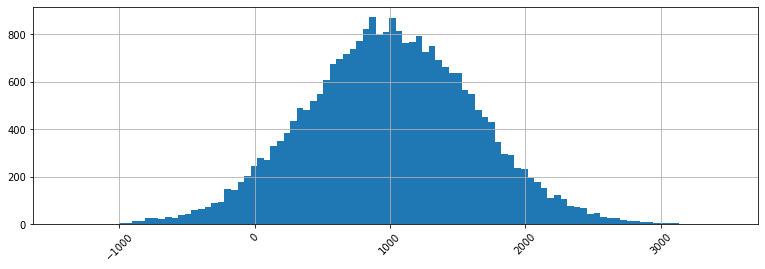

In [11]:
Tienda4['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=45)

## Q-Q Plot

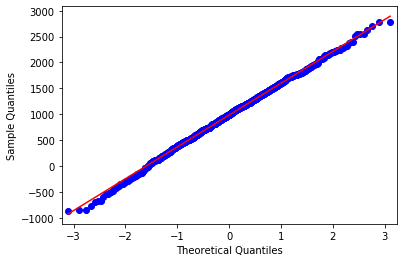

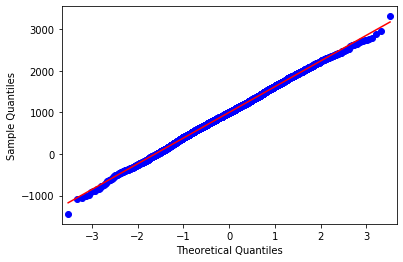

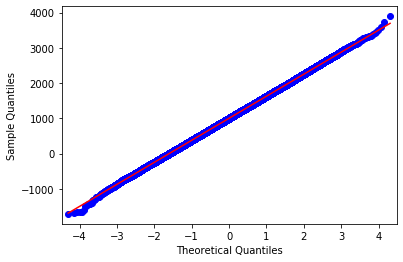

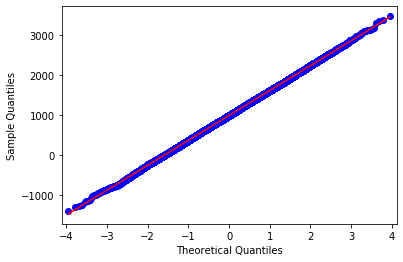

In [12]:
import statsmodels.api as sm
import pylab

sm.qqplot(Tienda1['Precio'],loc=4,scale=3,line='s')
sm.qqplot(Tienda2['Precio'],loc=4,scale=3,line='s')
sm.qqplot(Tienda3['Precio'],loc=4,scale=3,line='s')
sm.qqplot(Tienda4['Precio'],loc=4,scale=3,line='s')
pylab.show()

### Test D'Agostino $K^2$

$$\begin{array}{cl}
H_0: & \text{Los datos siguen una distribucion normal} \\
H_1: & \text{Los datos no siguen una distribucion normal}
\end{array}$$

In [19]:
from scipy.stats import normaltest

print(normaltest(Tienda1['Precio']))
print(normaltest(Tienda2['Precio']))
print(normaltest(Tienda3['Precio']))
print(normaltest(Tienda4['Precio']))

NormaltestResult(statistic=1.9154233491120167, pvalue=0.3837700727700658)
NormaltestResult(statistic=2.350339748161295, pvalue=0.3087665238033325)
NormaltestResult(statistic=1.6947200592734597, pvalue=0.4285447854355464)
NormaltestResult(statistic=0.1875407940186787, pvalue=0.9104917898810917)


### Kolmogorov-Smirnov

In [46]:
media_Tienda1, desviacion_Tienda1=stats.norm.fit(Tienda1['Precio'])
media_Tienda2, desviacion_Tienda2=stats.norm.fit(Tienda2['Precio'])
media_Tienda3, desviacion_Tienda3=stats.norm.fit(Tienda3['Precio'])
media_Tienda4, desviacion_Tienda4=stats.norm.fit(Tienda4['Precio'])

In [47]:
print(stats.kstest(Tienda1['Precio'],'norm',args=(media_Tienda1,desviacion_Tienda1)))
print(stats.kstest(Tienda2['Precio'],'norm',args=(media_Tienda2,desviacion_Tienda2)))
print(stats.kstest(Tienda3['Precio'],'norm',args=(media_Tienda3,desviacion_Tienda3)))
print(stats.kstest(Tienda4['Precio'],'norm',args=(media_Tienda4,desviacion_Tienda4)))


KstestResult(statistic=0.016147158996491662, pvalue=0.9469168372995359)
KstestResult(statistic=0.011227977507361764, pvalue=0.6025564753237265)
KstestResult(statistic=0.0014784978855777453, pvalue=0.956314351482409)
KstestResult(statistic=0.0038116925661565437, pvalue=0.8369698965921522)


### Anderson-Darling

In [16]:
anderson_tienda1=stats.anderson(Tienda1['Precio'],dist='norm')

In [17]:
for i in range(len(anderson_tienda1.critical_values)):
    sl, cv = anderson_tienda1.significance_level[i], anderson_tienda1.critical_values[i]
    if anderson_tienda1.statistic < cv:
        print('Los datos siguen una distribución Normal a un nivel de signifgicación de %.0f%%' %(sl))
    else:
        print('Los datos NO siguen una distribución Normal a un nivel de signifgicación de %.0f%%' %(sl))

Los datos siguen una distribución Normal a un nivel de signifgicación de 15%
Los datos siguen una distribución Normal a un nivel de signifgicación de 10%
Los datos siguen una distribución Normal a un nivel de signifgicación de 5%
Los datos siguen una distribución Normal a un nivel de signifgicación de 2%
Los datos siguen una distribución Normal a un nivel de signifgicación de 1%


### Shapiro Wilk

In [51]:
from scipy.stats import shapiro

shapiro(Tienda1['Precio'])

estadistico, p_v=shapiro(Tienda1['Precio'])

if p_v >0.05:
    print("Aceptamos la Hipotesis Nula")
else:
    print("Rechazamos la Hipotesis Nula")

Aceptamos la Hipotesis Nula


## Test Homegenidad de Varianzas

### Test de Bartlett

In [56]:
stats.bartlett(df['Precio'][df['Tienda']=='Tienda_112'],
               df['Precio'][df['Tienda']=='Tienda_302'],
               df['Precio'][df['Tienda']=='Tienda_732'],
               df['Precio'][df['Tienda']=='Tienda_652']
              )

BartlettResult(statistic=2.8127699374377944, pvalue=0.4214020699955464)

### Test de Levene

es menos sensible que el test de Bartlett

In [57]:
stats.levene(df['Precio'][df['Tienda']=='Tienda_112'],
               df['Precio'][df['Tienda']=='Tienda_302'],
               df['Precio'][df['Tienda']=='Tienda_732'],
               df['Precio'][df['Tienda']=='Tienda_652']
              )

LeveneResult(statistic=1.201853566283296, pvalue=0.30733097476433613)

## ANOVA

In [60]:
from statsmodels.formula.api import ols


In [61]:
model=ols('Precio ~ Tienda', data=df).fit()
tabla_anova=sm.stats.anova_lm(model,typ=2)


In [62]:
tabla_anova

,sum_sq,df,F,PR(>F)
Tienda,4.983431e+05,3.0,0.426016,0.734353
Residual,5.914543e+10,151684.0,NaN,NaN


# Ejemplo 2

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [71]:
df.drop('person',axis=1,inplace=True)

In [72]:
df.shape

(15, 2)

In [73]:
df['dose'].replace({1:'Placebo',2:'Baja',3:'Alta'},inplace=True)

In [74]:
df.head(2)

,dose,libido
0,Placebo,3
1,Placebo,2


In [75]:
stats.f_oneway(df['libido'][df['dose']=='Placebo'],
              df['libido'][df['dose']=='Alta'],
              df['libido'][df['dose']=='Baja'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [76]:
model = ols('libido ~ C(dose)',data=df).fit()
tabla_anova=sm.stats.anova_lm(model,typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN
